In [ ]:
import numpy as np
from analysis import AstrocyteAnalyzer
from analysis import AstrocytePlotter
from importlib import reload  # Python 3.4+ only
AstrocyteAnalyzer = reload(AstrocyteAnalyzer)
AstrocytePlotter = reload(AstrocytePlotter)
import os, sys, glob
import plotly.offline as offline
from preprocessing import analysis_pp
from analysis.general_utils import aqua_utils, saving_utils, plotly_utils, general_utils, compare_astro_utils, correlation_utils, duration_utils, stat_utils
import pandas as pd
from scipy.stats import ttest_ind_from_stats

analysis_pp = reload(analysis_pp)
aqua_utils = reload(aqua_utils)
plotly_utils = reload(plotly_utils)
saving_utils = reload(saving_utils)
duration_utils = reload(duration_utils)
compare_astro_utils = reload(compare_astro_utils)
correlation_utils = reload(correlation_utils)
stat_utils = reload(stat_utils)

In [ ]:
output_base_folder = '/Users/achilsleasgeorgiou/Desktop/data_output'
output_folder = os.path.join(output_base_folder, 'misc') 

In [ ]:
#GW/Control
gw_y=[42, 219, 73, 102, 108]
control_y = [136, 124, 83, 84, 91]

tstat, pvalue = ttest_ind_from_stats(np.mean(gw_y), np.std(gw_y), len(gw_y), np.mean(control_y), np.std(control_y), len(control_y))

point_box = plotly_utils.plot_point_box_revised(['GW', 'Control'], [gw_y, control_y], title='GW/Control Test p={:.2e}'.format(pvalue), width=500, height=500)
point_box.show('svg')

saving_utils.dict_to_csv({'gw_y' : gw_y, 'control_y' : control_y}, 'gw_control_data', output_folder)

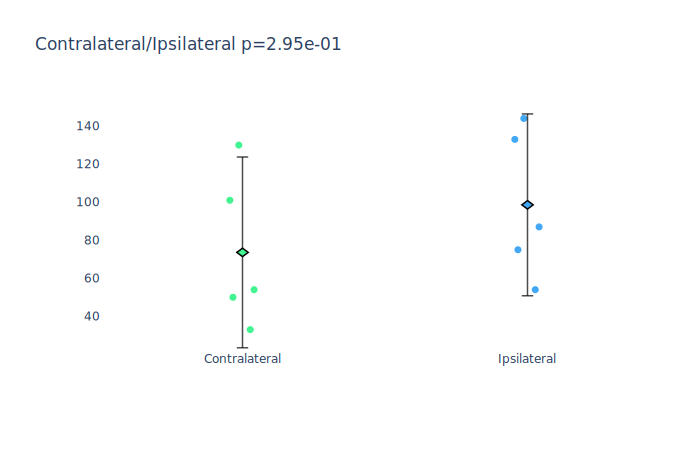

,contralateral,ipsilateral
0,130,54
1,101,133
2,50,87
3,33,75
4,54,144


In [9]:
contralateral = [130, 101, 50, 33, 54]
ipsilateral = [54, 133, 87, 75, 144]

tstat, pvalue = ttest_ind_from_stats(np.mean(contralateral), np.std(contralateral), len(contralateral), 
                                     np.mean(ipsilateral), np.std(ipsilateral), len(ipsilateral))

point_box_2 = plotly_utils.plot_point_box_revised(['Contralateral', 'Ipsilateral'], [contralateral, ipsilateral], title='Contralateral/Ipsilateral p={:.2e}'.format(pvalue), width=500, height=500)

point_box_2.show('svg')

saving_utils.dict_to_csv({'contralateral' : contralateral, 'ipsilateral' : ipsilateral}, 'contralateral_ipsilateral_data', output_folder)

In [ ]:
hour_1 = [9.4, 7.8, 7.645113, 7.506638, 6.388628, 5.879534, 6.30877, 10.17189, 8.694524, 11.10024]
day_10 = [13.7, 8.747743, 23.88229, 21.5893, 16.30327, 13.2, 24.9, 25.6, 19.4, 25.4, 18.7, 23.4]
cell_body = [31.19128, 41, 29, 26.90802, 36.84701, 53.33333, 32.27459, 56.7, 32.7, 41.9, 38.1, 36, 46.1, 39, 56.2]

point_box_3 = plotly_utils.plot_point_box_revised(['1h background', '10d background', 'Cell body'], [hour_1, day_10, cell_body], title='Capsid density'.format(pvalue), width=500, height=500)
point_box_3.show('svg')

saving_utils.dict_to_csv({'hour_1' : hour_1, 'day_10' : day_10, 'cell_body' : cell_body}, 'capsid_density_data', output_folder)

In [ ]:
saving_utils.save_plotly_fig(point_box, os.path.join(output_folder, 'gw_control'), width=500, height=500)
saving_utils.save_plotly_fig(point_box_2, os.path.join(output_folder,'contralateral_ipsilateral'), width=500, height=500)
saving_utils.save_plotly_fig(point_box_3, os.path.join(output_folder, 'capsid_density'), width=500, height=500)

In [ ]:
astro_layer_1 = [0, 0, 0, 0, 0, 0, 0, 0, 5.32067721579603, 12.5926609971708, 9.27966593202645, 3.82719451333395, 0, 0, 0]
astro_layer_2 = [3.17242779554337, 4.65003813031267, 2.06905684112954, 6.60870829492022, 4.64707048676514, 6.49481389110795, 3.99167602492935, 5.28865477777073, 4.25484839975152, 5.17090486957039, 1.42577080734272, 1.89136026630353, 2.72485503771199, 4.48552789280665, 3.59658540181951]
astro_layer_3 = [10.8124685455461, 11.9126004990297, 15.1936429797773, 23.6802690078559, 32.1863787245238, 19.4141583574069, 30.4454040835812, 30.7918471135127, 25.8392925201708, 15.3295921267215, 12.9844835421671, 14.9698606804966, 15.3139356814701, 16.167213231928, 15.0158166602154]
astro_layer_4 = [5.39728, 2.95308, 4.20275, 3.80695, 4.8694, 5.93932, 5.36313, 7.92186, 4.2738, 4.13724, 4.49476, 3.49989, 4.78446, 4.47299, 6.61117]
import numpy as np, scipy.stats as st
astro_layers = [astro_layer_1, astro_layer_2, astro_layer_3, astro_layer_4]

for i, astro_layer in enumerate(astro_layers):
    m, ci_low, ci_up = stat_utils.mean_confidence_interval(astro_layer)
    ci = m - ci_low
    print(f'Astro layer: {i+1} Mean: {np.mean(astro_layer)} Std: {np.std(astro_layer)} CI: {ci}')

point_box_4 = plotly_utils.plot_point_box_revised(['astro_layer_1', 'astro_layer_2', 'astro_layer_3', 'astro_layer_4'], [astro_layer_1, astro_layer_2, astro_layer_3, astro_layer_4], title='Layer density (Astrocyte)', width=500, height=500)
point_box_4.show('svg')


saving_utils.dict_to_csv({'astro_layer_1' : astro_layer_1, 'astro_layer_2' : astro_layer_2, 'astro_layer_3' : astro_layer_3, 'astro_layer_4' : astro_layer_4}, 'layer_density_astrocyte_data', output_folder)

saving_utils.save_plotly_fig(point_box_4, os.path.join(output_folder, 'layer_density_astrocyte'), width=500, height=500)

In [ ]:
axon_layer_1 = [0, 0, 0, 10.3813053, 0, 0, 0, 0, 2.69623175]
axon_layer_2 = [0, 0.68306944, 0.48791365, 2.4766575, 0.92149252, 1.10027947, 5.40956825, 5.09145527, 6.36754488]
axon_layer_3 = [5.24155106, 5.18161563, 4.47253195, 16.3689745, 14.1505351, 22.3286278, 12.9293347, 8.15240196, 9.36809103]
axon_layer_4 = [8.7271679, 6.14310989, 4.60144577, 10.039829, 7.96686653, 9.54529677, 13.8465799, 17.432792, 4.89236791]

axon_layers = [axon_layer_1, axon_layer_2, axon_layer_3, axon_layer_4]

for i, axon_layer in enumerate(axon_layers):
    m, ci_low, ci_up = stat_utils.mean_confidence_interval(axon_layer)
    ci = m - ci_low
    print(f'Axon layer: {i+1} Mean: {np.mean(axon_layer)} Std: {np.std(axon_layer)} CI: {ci}')

point_box_5 = plotly_utils.plot_point_box_revised(['axon_layer_1', 'axon_layer_2', 'axon_layer_3', 'axon_layer_4'], [axon_layer_1, axon_layer_2, axon_layer_3, axon_layer_4], title='Layer density (Neuron)', width=500, height=500)
point_box_5.show('svg')

saving_utils.dict_to_csv({'axon_layer_1' : axon_layer_1, 'axon_layer_2' : axon_layer_2, 'axon_layer_3' : axon_layer_3, 'axon_layer_4' : axon_layer_4}, 'layer_density_neuron_data', output_folder)

saving_utils.save_plotly_fig(point_box_5, os.path.join(output_folder, 'layer_density_neuron'), width=500, height=500)
